Nog een keer hetzelfde programma alleen deze keer maak ik het met ctk. Dat is een Python UI library based on Tkinter die een nieuw, modernere widgets heeft.

In [757]:
# import sys
# !{sys.executable} -m pip install ctk

In [758]:
import tkinter as tk
import customtkinter as ctk
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [759]:
class App():
    def __init__(self):
        ctk.set_appearance_mode("dark")  # Modes: "System" (standard), "Dark", "Light"
        ctk.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue"

        self.app = ctk.CTk()
        self.app.geometry("400x400")
        self.app.title("DataVisualisation App voor Biker")
        
        self.loginAttempts = 0
        self.createLogin()
        
        # wanneer de windows word gesloten sluit hij ook het programma.
        self.app.protocol("WM_DELETE_WINDOW", self.closeApp)
        

    def loginCheck(self):
        # gelezen logingegevens... Super Secure!!!
        creds = pd.read_csv('logingegevens.csv')

        # omzetten naar 2D array. [[username, password], [username, password], enz..]
        credsArr = creds.to_numpy()

        # check login input
        self.username = self.usernameEntry.get()
        self.password = self.passwordEntry.get()

        # loop series van namen en ww
        for arr in credsArr:
            # subset van naam en ww
            if arr[0] == self.username:
                if arr[1] == self.password:
                    # username en password zijn correct
                    self.loginOut(True)
                    return
        
        self.loginOut(False)
                
    def loginOut(self, out):
        if out == True:
            m = Main()
            m.main.mainloop()
            self.closeApp()

        # login pogingen staat op 2. de user heeft namelijk maar 3 pogingen.
        if self.loginAttempts >= 2 and out == False:
            # de reden voor and out == False is omdat als de user 2 keer zijn wachtwoord fout invult en daarna correct triggert hij ook als de 2e conditie er niet staat
            e = ErrorWindow(reden="WW")
            e.window.mainloop()
            self.closeApp()
            
        elif out == False:
            self.loginAttempts = self.loginAttempts + 1
            label = ctk.CTkLabel(master=self.loginWindow, text=f'Logingegevens zijn incorrect.')
            label.pack()

            labelMessage = ctk.CTkLabel(master=self.loginWindow, text=f'Dit is poging {self.loginAttempts}. u heeft nog {3- self.loginAttempts} pogingen')
            labelMessage.pack()
    
    def closeApp(self):
        self.app.quit()
        self.app.destroy()

    def startApp(self):
        self.app.mainloop()


    def createLogin(self):
        self.loginWindow = ctk.CTkFrame(master=self.app)
        self.loginWindow.pack(pady=20, padx=60, fill="both", expand=True)

        self.usernameEntry = ctk.CTkEntry(master=self.loginWindow, placeholder_text="Please enter your username:")
        self.usernameEntry.pack(pady=10, padx=10)

        self.passwordEntry = ctk.CTkEntry(master=self.loginWindow, placeholder_text="Please enter your password", show="*")
        self.passwordEntry.pack()

        self.logInButton = ctk.CTkButton(master=self.loginWindow, text="Login!", command=self.loginCheck)
        self.logInButton.pack(pady=10, padx=10)
        
        self.close = ctk.CTkButton(master=self.loginWindow, text="Afsluiten", command=self.closeApp)
        self.close.pack()



In [760]:
class Main():
    def __init__(self):
        self.main = ctk.CTk()
        self.main.geometry("600X800")
        self.createFrames()

        # wanneer de windows word gesloten sluit hij ook het programma.
        self.main.protocol("WM_DELETE_WINDOW", self.closeApp)

    def createFrames(self):
        self.frameSide = ctk.CTkFrame(master=self.main)
        self.frameSide.pack(expand=False, side="left", fill="y", padx=100, pady=400)
        self.fillFrameSide()

        self.frameMain = ctk.CTkFrame(master=self.main, width=1000, height=400)
        self.frameMain.pack(expand=False, side="right", fill="y")
        self.frameMain.pack_propagate(False)
        self.fillFrameMain()

    def fillFrameSide(self):
        self.options = ctk.CTkFrame(master=self.frameSide)
        # .pack(fill="none", expand=True) => centers widget! options aangemaakt voor style om de options te centeren in de sideFrame
        self.options.pack(fill="none", expand=True)
        self.label = ctk.CTkLabel(master=self.options, text="Kies hieronder data dat je wilt zien")
        # .pack(fill="none", expand=True) => centers widget!
        self.label.pack()

        self.artikelTaartButton = ctk.CTkButton(master=self.options, text="Verdeling van artikelen in een taart diagram", command=self.onArtikelTaartButton)
        self.artikelTaartButton.pack()

        self.artikelBarButton = ctk.CTkButton(master=self.options, text="Verdeling van artikelen in een bar diagram", command=self.onArtikelBarButton)
        self.artikelBarButton.pack()

        self.close = ctk.CTkButton(master=self.options, text="Afsluiten", command=self.closeApp)
        self.close.pack()

    # mainFrame word gevult opn basis van de keuzes links!
    def fillFrameMain(self):
        self.components = ctk.CTkFrame(master=self.frameMain, width=800, height=700)
        self.components.pack(fill="none", expand=True)
        self.components.pack_propagate(False)

        self.label = ctk.CTkLabel(master=self.components, text="Maak een keuze in het menu links!")
        self.label.pack(fill="none", expand=True)

    # button functions
    def onArtikelTaartButton(self):
        self.fig, self.ax = plt.subplots()
        labels = ["Spellen", "Consoles"]
        colSpel = ["TITEL"]
        colConsole = ["TYPE"]
        dataSpel = pd.read_csv('Artikel.csv', usecols=colSpel, encoding='latin-1')
        dataConsole = pd.read_csv('Artikel.csv', usecols=colConsole, encoding='latin-1')
        dataConsole.dropna(inplace=True)
        dataSpel.dropna(inplace=True)
        val = [dataSpel.size, dataConsole.size]
        self.ax.pie(val, labels = labels, startangle = 90, autopct='%1.1f%%')

        self.ax.set_title("Pie chart over de verdeling van alle artikelen!")

        # globalefunctie defined in het laatste codescherm
        self.createWindow(self.fig)
    
    def onArtikelBarButton(self):
        self.fig, self.ax = plt.subplots()
        labels = ["Spellen", "Consoles"]
        colSpel = ["TITEL"]
        colConsole = ["TYPE"]
        dataSpel = pd.read_csv('Artikel.csv', usecols=colSpel, encoding='latin-1')
        dataConsole = pd.read_csv('Artikel.csv', usecols=colConsole, encoding='latin-1')

        dataConsole.dropna(inplace=True)
        dataSpel.dropna(inplace=True)
        name = ["spel", "Console"]
        val = [dataSpel.size, dataConsole.size]

        self.ax.bar(labels, val)
        self.ax.set_title("Bar chart over de verdeling tussen consoles en artikelen!")

        # globalefunctie defined in het laatste codescherm
        self.createWindow(self.fig)
    
    # def destroyStartMain(self):
    #     if len(self.startComponents) == 0:
    #         return
    #     else:    
    #         for component in self.startComponents:
    #             print(component)
    #             component.destroy()
                
    def createWindow(self, figure):
        self.resetComponents()
        self.canvasFrame = ctk.CTkFrame(master=self.components)
        self.canvasFrame.pack()
        canvas = FigureCanvasTkAgg(figure, self.canvasFrame)
        canvas.draw()

        label = ctk.CTkLabel(text="Hello there!", master=self.components)

        canvas.get_tk_widget().pack(fill="none", expand=True)

    def resetComponents(self):
        for widget in self.components.winfo_children():
            widget.destroy()


    def closeApp(self):
        self.main.quit()
        self.main.destroy()


Ik heb destroyStartMain() toegevoegd omdat zodra de user een keuze maakt in het keuzemenu moet main leeg zijn en nieuwe data komen obv de keuze. zie comments over de werking.  <br>
De array self.startComponents word gevuld met alle componenten die aanwezig zijn voordat een keuze word gemaakt. de functie destroyStartMain() loopt dan door alle componenten en .destroy() op alle componenten. <br>

```
def destroyStartMain(self):
        for component in self.startComponents:
            component.destroy()
```


In [761]:
class ErrorWindow():
    def __init__(self, reden):
        self.reden = reden
        self.window = ctk.CTk()

        if self.reden == "WW":
            self.message = "U heeft 3 keer de verkeerde logingegevens ingevuld. De applicatie sluit nu."
        else:
            self.message = "Error is unknown"            

        errorMessage = ctk.CTkLabel(master=self.window, text=self.message)
        errorMessage.pack()

        # wanneer de windows word gesloten sluit hij ook het programma.
        self.window.protocol("WM_DELETE_WINDOW", self.closeApp)


    def closeApp(self):
        self.window.quit()
        self.window.destroy()


In [762]:
x = App()
x.startApp()


Er is een soort van bug met CTK dat het programma blijft runnen wanneer de app is gesloten. Dit komt omdat de window van zichzelf op state: withdrawn springt zodra CTK met eigen aanpassingen een TK window aanmaakt. Hier is nog geen oplossing voor... dus het programma moet handmatig gesloten worden door op het stopteken te klikken

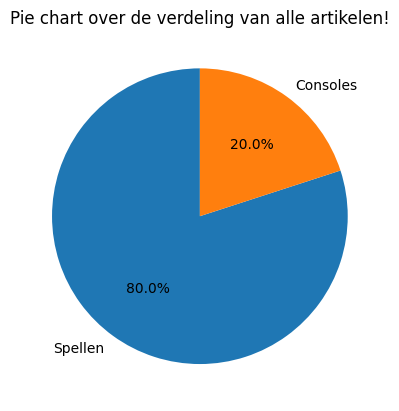

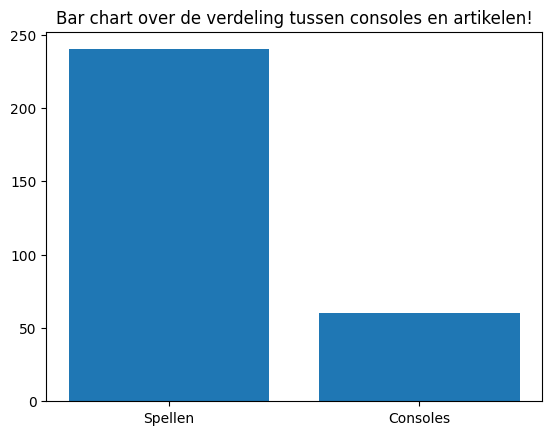

In [763]:
x = Main()
x.main.mainloop()